# Histogram (automatic and manual methods)

How to plot a histogram in Python. This goes over automatic methods (which is what you'll use in practice) and also digs a bit deeper into how to manually calculate the bin edges and counts in a histogram, similar to what is described in Files → Labs → [Guidelines to plot a histogram.pdf](https://utah.instructure.com/courses/722066/files/folder/Labs?preview=119193793)

## Import Modules

In [68]:
%matplotlib inline
from matplotlib.pyplot import hist
import pandas as pd
import numpy as np
from math import ceil, sqrt
import os

## Read Data

In [5]:
df = pd.read_excel("test_data.xlsx")

## Plotting

### Using Defaults (10 bins)

<AxesSubplot:ylabel='Frequency'>

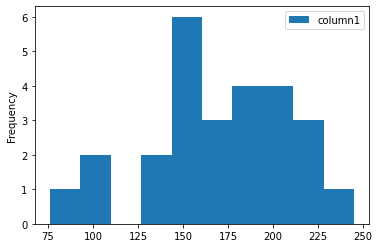

In [11]:
df.plot.hist()

At this point, we could be done, as we've plotted a histogram. The instructions for the assignment talk about using the square root estimator, however.

### Using Square Root

(array([2., 2., 7., 6., 5., 4.]),
 array([ 76.        , 104.16666667, 132.33333333, 160.5       ,
        188.66666667, 216.83333333, 245.        ]),
 <BarContainer object of 6 artists>)

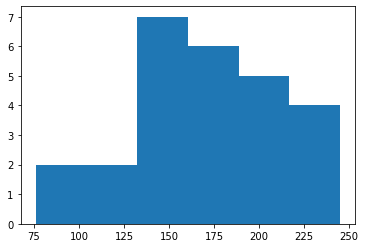

In [59]:
hist(df, bins="sqrt")

At this point, we really are done, but let's take a look at other things we can do with the hist function and what's going on under the hood with determining the bin frequencies and bin edges.

### Using "Auto" Number of Bins

(array([2., 2., 7., 6., 5., 4.]),
 array([ 76.        , 104.16666667, 132.33333333, 160.5       ,
        188.66666667, 216.83333333, 245.        ]),
 <BarContainer object of 6 artists>)

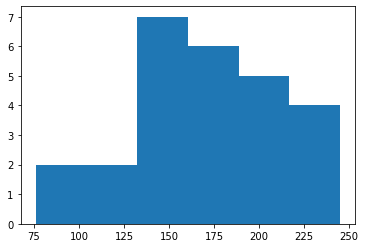

In [13]:
hist(df, bins="auto")

### Determine Bin Counts and Bin Edges using NumPy

In [16]:
counts, bins = np.histogram(df['column1'], bins="sqrt")
print(counts)
print(bins)

[2 2 7 6 5 4]
[ 76.         104.16666667 132.33333333 160.5        188.66666667
 216.83333333 245.        ]


(array([2., 2., 7., 6., 5., 4.]),
 array([ 76.        , 104.16666667, 132.33333333, 160.5       ,
        188.66666667, 216.83333333, 245.        ]),
 <BarContainer object of 6 artists>)

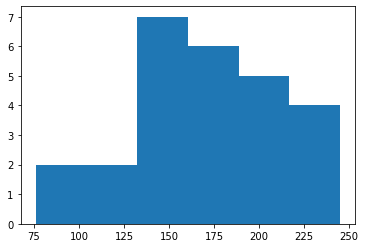

In [17]:
hist(df, bins=bins)

### Manually determine bin counts and edges

This mirrors the example on Canvas from Files → Labs → Lab1 → [Lab1-histogram.pdf](https://utah.instructure.com/courses/722066/files/folder/Labs/Lab1?preview=119193799)

#### Dataset min, max, and length

In [20]:
col1 = df['column1']
mn = min(col1)
mx = max(col1)
print(mn, mx)
n = len(col1)
print(n)

76 245
26


#### Number of bins (using square root), bin width, and bin edges

In [26]:
nbins = ceil(sqrt(n))
print(nbins)

6


In [27]:
binwidth = (mx-mn)/nbins
print(binwidth)

28.166666666666668


In [29]:
bins = np.linspace(mn, mx, num=nbins+1)

#### Histogram using manually determined bin edges

(array([2., 2., 7., 6., 5., 4.]),
 array([ 76.        , 104.16666667, 132.33333333, 160.5       ,
        188.66666667, 216.83333333, 245.        ]),
 <BarContainer object of 6 artists>)

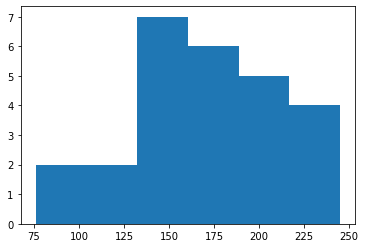

In [30]:
hist(df, bins=bins)

### Histogram without using hist()

Find how the data fits into the bins.

In [60]:
ids = np.searchsorted(bins, col1)
np.unique(ids)
ids[ids==0]=1
print(ids)

[2 1 6 4 5 3 6 5 3 5 6 3 6 2 4 4 3 3 4 5 4 3 4 3 5 1]


Count up the frequencies

In [61]:
freq = np.bincount(ids)[1:]
print(freq)

[2 2 7 6 5 4]


Change the bin edges into pairs.

In [65]:
ab = list(zip(bins[:-1], bins[1:]))
print(ab)

[(76.0, 104.16666666666667), (104.16666666666667, 132.33333333333334), (132.33333333333334, 160.5), (160.5, 188.66666666666669), (188.66666666666669, 216.83333333333334), (216.83333333333334, 245.0)]


Find the center of each bin

In [66]:
bin_centers = [(a + b)/2 for a, b in ab]

Plot using the bin_centers, frequency values, and calculated bin width.

<BarContainer object of 6 artists>

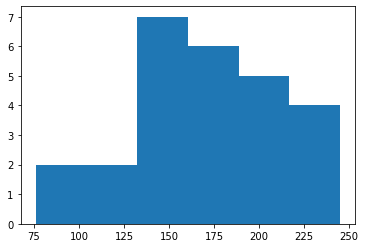

In [64]:
plt.bar(bin_centers, freq, width=binwidth)

Note that you should never really need to do this kind of "manual" plotting, but this illustrates how you would essentially calculate this "by hand", similar to the instructions shown on Canvas in the file linked above. In other words, plt.hist(df, bins="auto") is pretty much all you'd need.

## Print this notebook to PDF

In [69]:
os.system("jupyter nbconvert --to pdf histogram-auto-vs-manual.ipynb")

0